In [2]:
%matplotlib inline
from __future__ import print_function

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
 
import importlib
import pickle
from utils.data_utils import *
from utils.preprocessing import *
from utils.helper import *
root = '/Users/thorey/Documents/project/competition/fognet/models/bbking/lstm'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
df = build_dataset()

In [77]:
base_model = os.path.join(root,'model_0')
config = parse_conf_file(os.path.join(base_model,'conf_model.json'))

In [78]:
from utils.train_utils import *

In [88]:
model.hiddens = 200
model = Model(config)

{'hiddens': 60, 'lr': 0.0001, 'reg': 1e-06}
Loading the prepro pipeline
{u'pipe_kwargs': {u'micro': {u'FeatureSelector__features': [u'leafwet450_min',
                                                            u'leafwet_lwscnt',
                                                            u'percip_mm',
                                                            u'temp',
                                                            u'gusts_ms',
                                                            u'wind_ms',
                                                            u'leafwet460_min',
                                                            u'wind_dir',
                                                            u'humidity'],
                             u'FillRemainingNaN__method': u'bfill',
                             u'MissingValueInputer__method': u'time'}},
 u'pipe_list': {u'micro': [u'FeatureSelector',
                           u'MissingValueInputer',
                  

In [89]:
model.nb_epochs = 50
model.train()

# Neural Network with 17041 learnable parameters

## Layer information

  #  name    size
---  ------  -------
  0  in      Nonex9
     lstm_0  Nonex60
             60
     dense   1
             None

  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  ------
      1      15.10965       6.91889      2.18383  34.62s
      2      12.63618       5.94277      2.12631  33.19s
      3      10.33209       5.48084      1.88513  42.18s
      4       9.31214       5.14219      1.81093  49.37s
      5       8.58122       4.84835      1.76993  38.46s
      6       8.08270       4.61252      1.75234  35.95s
      7       7.68225       4.39490      1.74799  43.06s
      8       7.38488       4.19721      1.75947  48.34s
      9       7.14825       4.05001      1.76500  39.50s
     10       6.88618       3.92197      1.75579  48.26s
     11       6.68595       3.82613      1.74745  39.72s
     12       6.47962       3.72934      1.73747  39.58s
   

In [107]:
from utils.train_utils import *

In [113]:
base_model

'/Users/thorey/Documents/project/competition/fognet/models/bbking/lstm/model_0'

In [110]:
config = parse_conf_file(os.path.join(base_model,'hiddens_60_lr_0.0001_reg_1e-06/conf_model.json'))
model = Model(config,mode='inspection')

{'hiddens': 60, 'lr': 0.0001, 'reg': 1e-06}
Loading the prepro pipeline
{u'pipe_kwargs': {u'micro': {u'FeatureSelector__features': [u'leafwet450_min',
                                                            u'leafwet_lwscnt',
                                                            u'percip_mm',
                                                            u'temp',
                                                            u'gusts_ms',
                                                            u'wind_ms',
                                                            u'leafwet460_min',
                                                            u'wind_dir',
                                                            u'humidity'],
                             u'FillRemainingNaN__method': u'bfill',
                             u'MissingValueInputer__method': u'time'}},
 u'pipe_list': {u'micro': [u'FeatureSelector',
                           u'MissingValueInputer',
                  

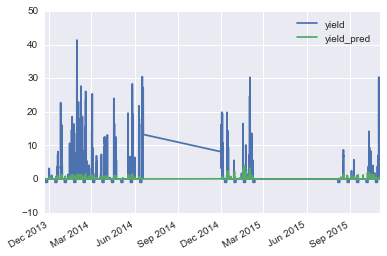

In [112]:
df = model.predict_yield('train')
df[['yield','yield_pred']].plot()

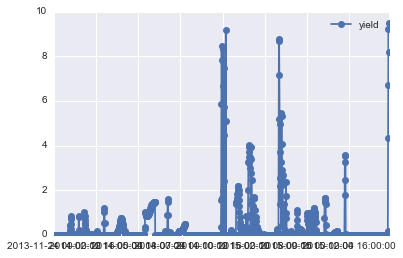

In [90]:
a = pd.read_csv(os.path.join(base_model,'hiddens_60_lr_0.0001_reg_1e-06/submissions_20160331_122539.csv'),index_col=0)
a.plot(marker ='o')

In [103]:
dft = model.predict_yield('train')
model.get_score_set('train')/np.mean(dft['yield'])

4.1512567312364368

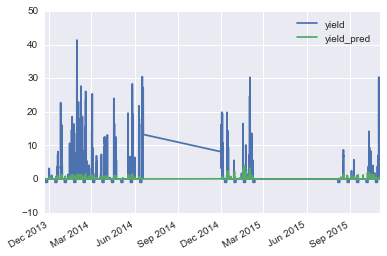

In [93]:
df[['yield','yield_pred']].plot()

In [101]:
model.get_score_set('train')

4.1621926053235292

In [97]:
from sklearn.metrics import mean_squared_error

In [102]:
dft = df[df['yield']!=-1]
np.sqrt(mean_squared_error(dft['yield'],dft['yield_pred']))/(np.mean(dft['yield']))

2.672394660191983

In [ ]:
mean_squared_error(df['yield'],'d')